<a href="https://colab.research.google.com/github/deepintomlf/mlfbook/blob/master/Chapter5_NeuralNetwork/%E5%8D%B7%E7%A7%AF%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Section 5.3 - 卷积神经网络

This notebook contains all demo codes in Section 5.3.

The goal of this session is to help you 

1. understand how to use CNN for the image classification;
2. implement CNN to empirical datasets using Keras;
3. fine tune your CNN models to achieve better performance.


![alt text](https://docs.google.com/uc?export=download&id=1oXzt8ryDo_gkzI_78jXLvSkx7qLdqqb-)



## Image Classification using Convolutional Neural Networks (CNN)

1. **Dataset**: $\mathcal{D} = (X_i, Y_i)_{i=1}^{N}$,
where 
 * Input: Image Data $X$ with dimension (width, height, depth = 3).

 * Output: Objects in images $Y$ (represented in one hot vector). 

2. **CNN Model**: $f_{\theta}(X, Y) = P(Y\vert X)$.

 * Input Layer: Image Data (3D tensor - (width, height, depth))

 *  Ouput Layer: A vector of the length being the number of classes (no of classes, 10). 

 * Building blocks of CNNs
 
        (1) Convolutional Layer;
 
        (2) Pooling Layer;
 
        (3) Fully connected (Dense) Layer. 


3. ** Loss Function**: 
\begin{eqnarray*}
L(\theta \vert \mathcal{D})  = - \frac{1}{N}\sum_{i=1}^{N}\log P(Y_{i}\vert X_{i}) = - \frac{1}{N} \sum_{i = 1}^{N}\langle  y_{i}, \log(p_{\theta }(  \cdot \vert x_{i})) \rangle, .
\end{eqnarray*}

  where $y_i$ is a one-hot vector.  

4. ** Optimization**: 
\begin{eqnarray*}
\theta^{*} = \arg\min_{\theta} L(\theta \vert \mathcal{D}) .
\end{eqnarray*}

5. ** Prediction**: 

\begin{eqnarray*}
\hat{Y}_{new} = \arg\max_{y} f_{\theta^{*}}  (X_{new}, y) .
\end{eqnarray*}

6. **Test and Validation**:  e.g. the accuracy of the estimated model, i.e.

\begin{eqnarray*}
\frac{\sum_{i=1}^{N}1(Y_{i} == \hat{Y}_{i})}{N}.
\end{eqnarray*}


## 预处理Cifar10数据集中的数据

In [1]:
from keras.datasets import cifar10
from keras.utils import to_categorical
        
# 加载Cifar10数据集
(x_cifar10_train, y_cifar10_train), (x_cifar10_test, y_cifar10_test) = cifar10.load_data()

# 标准化输入数据
x_train = x_cifar10_train.astype('float32')
x_test = x_cifar10_test.astype('float32')
x_train /= 255
x_test /= 255

# 将输出的类别由整数编码转换为one-hot编码
num_classes = 10
y_train = to_categorical(y_cifar10_train, num_classes)
y_test = to_categorical(y_cifar10_test, num_classes)


Using TensorFlow backend.


170500096/170498071 [==============================] - 19s 0us/step


##使用LeNet实现卷积神经网络进行图像分类

**LeNet结构**

![alt text](https://docs.google.com/uc?export=download&id=175hXfs1m6v3e3NRVoKN7b51aSxe06xNA)

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import SGD
import time

def Lenet_Model_BaseLine(n_hidden_neurons):
    """ 使用LeNet构建卷积神经网络 """
    start_time = time.time()
    print('Compiling Model ... ')
    model = Sequential()
    # 依次添加两个卷积层和池化层
    model.add(Conv2D(n_hidden_neurons, (3, 3), input_shape=(32,32,3), activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(n_hidden_neurons, (3,3), activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # 将图像数据平铺成向量
    model.add(Flatten())
    model.add(Dense(512, activation ='relu'))
    model.add(Dense(10, activation ='softmax'))
    sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    print('Model compield in {0} seconds'.format(time.time() - start_time))
    return model

Lenet_Model = Lenet_Model_BaseLine(n_hidden_neurons=64)

# 查看LeNet的模型参数
print(Lenet_Model.summary())
hist_Lenet_Model = Lenet_Model.fit(x_train, y_train, epochs=40, validation_data=(x_test, y_test), verbose=1)


Compiling Model ... 
Instructions for updating:
Colocations handled automatically by placer.
Model compield in 0.15142154693603516 seconds
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1180160   
___

In [3]:
score = Lenet_Model.evaluate(x_test, y_test)
print(Lenet_Model.metrics_names)
print('Test ' + Lenet_Model.metrics_names[0] , score[0])
print('Test '+ Lenet_Model.metrics_names[1] , score[1])

10000/10000 [==============================] - 1s 79us/step
['loss', 'acc']
Test loss 1.8520755500793458
Test acc 0.6933


##**绘制训练结果图像**

In [0]:
from matplotlib import pyplot as plt    

def plot_hist_loss(hist):
  """ 绘制损失函数 """
  plt.figure()
  plt.plot(hist.history['loss'], 'b', linewidth=1.5)
  plt.plot(hist.history['val_loss'], 'r', linewidth=1.5)
  plt.legend(['Training set','Testing set'])
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  
def plot_hist_accuracy(hist):
  """ 绘制准确率 """
  plt.figure()
  plt.plot(hist.history['acc'], 'b', linewidth = 1.5)
  plt.plot(hist.history['val_acc'], 'r', linewidth = 1.5)
  plt.legend(['Training set','Testing set'])
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')

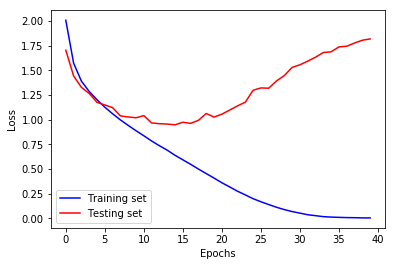

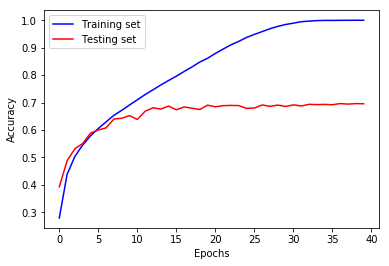

In [0]:
plot_hist_loss(hist_Lenet_Model)
plot_hist_accuracy(hist_Lenet_Model)

##**卷积神经网络的训练技巧**

当训练卷积神经网络或其他深度学习模型时, 可能会出现过拟合问题. 有以下几种常用的方法可以抑制过拟合问题:
*   数据增强(Data Augmentation);
*   Dropout正则化;
*   权值衰减(Weight regularization).

### **数据增强**

In [5]:
from keras.preprocessing.image import ImageDataGenerator

# 使用数据增强避免过拟合
datagen = ImageDataGenerator(horizontal_flip=True,
            width_shift_range=0.125, height_shift_range=0.125, fill_mode='constant',cval=0)
datagen.fit(x_train)


# 数据增强需要进行大量训练(因此使用160个训练时期)
Lenet_da_Model  = Lenet_Model_BaseLine(n_hidden_neurons=64)
hist_Lenet_da = Lenet_da_Model.fit_generator(datagen.flow(x_train, y_train,batch_size=128), 
                                             steps_per_epoch=391, epochs=160, validation_data=(x_test, y_test))

Compiling Model ... 
Model compield in 0.08510756492614746 seconds
Epoch 1/160
391/391 [==============================] - 17s 43ms/step - loss: 2.2220 - acc: 0.2026 - val_loss: 2.0492 - val_acc: 0.2693
Epoch 2/160
391/391 [==============================] - 17s 43ms/step - loss: 1.9984 - acc: 0.2775 - val_loss: 1.9289 - val_acc: 0.3090
Epoch 3/160
391/391 [==============================] - 19s 48ms/step - loss: 1.9242 - acc: 0.3118 - val_loss: 1.8354 - val_acc: 0.3625
Epoch 4/160
391/391 [==============================] - 17s 44ms/step - loss: 1.8417 - acc: 0.3460 - val_loss: 1.7333 - val_acc: 0.3976
Epoch 5/160
391/391 [==============================] - 18s 47ms/step - loss: 1.7523 - acc: 0.3735 - val_loss: 1.6497 - val_acc: 0.4133
Epoch 6/160
391/391 [==============================] - 17s 43ms/step - loss: 1.6786 - acc: 0.3984 - val_loss: 1.5798 - val_acc: 0.4342
Epoch 7/160
391/391 [==============================] - 17s 43ms/step - loss: 1.6222 - acc: 0.4179 - val_loss: 1.5045 - val_

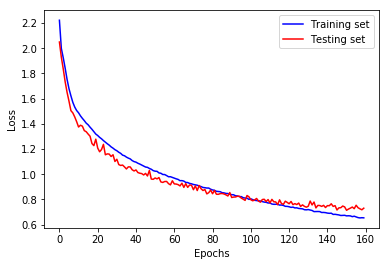

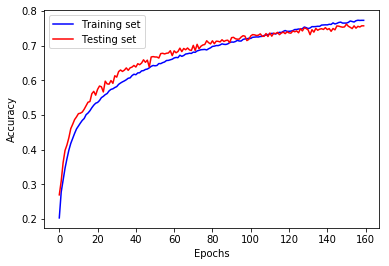

In [9]:
plot_hist_loss(hist_Lenet_da)
plot_hist_accuracy(hist_Lenet_da)

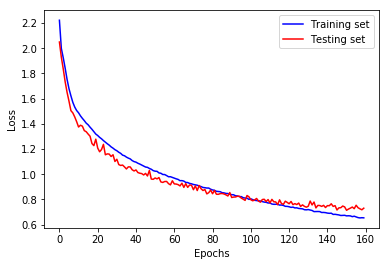

In [11]:
from google.colab import files
plt.figure()
plt.plot(hist_Lenet_da.history['loss'], 'b', linewidth=1.5)
plt.plot(hist_Lenet_da.history['val_loss'], 'r', linewidth=1.5)
plt.legend(['Training set','Testing set'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.savefig('LenetDataAugModelPerformance_Loss.png')
files.download('LenetDataAugModelPerformance_Loss.png')


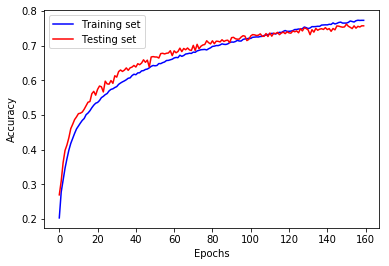

In [12]:
plt.figure()
plt.plot(hist_Lenet_da.history['acc'], 'b', linewidth = 1.5)
plt.plot(hist_Lenet_da.history['val_acc'], 'r', linewidth = 1.5)
plt.legend(['Training set','Testing set'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.savefig('LenetDataAugModelPerformance_Accuracy.png')
files.download('LenetDataAugModelPerformance_Accuracy.png')

In [8]:
score = Lenet_da_Model.evaluate(x_test, y_test)
score[1]

10000/10000 [==============================] - 1s 74us/step


0.7573

###**Dropout正则化**




In [16]:
from keras.layers import Dropout

def Lenet_Model_Dropout(n_hidden_neurons, dropout_rate):
    """ 使用Dropout正则化避免过拟合 """
    start_time = time.time()
    print('Compiling Model ... ')
    model = Sequential()
    model.add(Conv2D(n_hidden_neurons, (3, 3), input_shape=(32,32, 3),activation = 'relu' ))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # 添加Dropout
    model.add(Dropout(dropout_rate))
    model.add(Conv2D(n_hidden_neurons, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))
    model.add(Flatten())
    model.add(Dense(512, activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(10, activation = 'softmax'))
    
    sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    print('Model compield in {0} seconds'.format(time.time() - start_time))
    return model

Lenet_dropout_Model = Lenet_Model_Dropout(n_hidden_neurons=64, dropout_rate=0.25)
print(Lenet_dropout_Model.summary())
hist_Lenet_dropout_Model= Lenet_dropout_Model.fit(x_train, y_train, epochs=40, validation_data=(x_test, y_test), verbose=1)
  

Compiling Model ... 
Model compield in 0.2864198684692383 seconds
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_4 

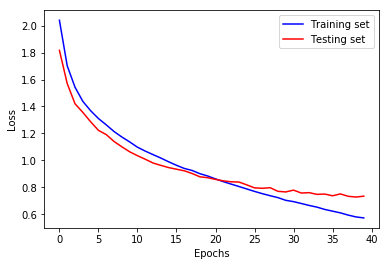

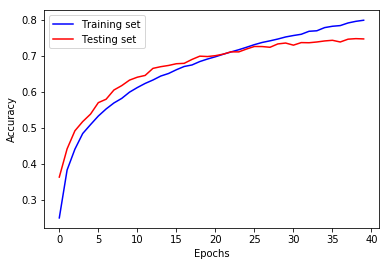

In [17]:
plot_hist_loss(hist_Lenet_dropout_Model)
plot_hist_accuracy(hist_Lenet_dropout_Model)

In [18]:
score = Lenet_dropout_Model.evaluate(x_test, y_test)
score[1]

10000/10000 [==============================] - 1s 76us/step


0.7474

####**使用交叉验证确定Dropout比例**

In [19]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

model = KerasClassifier(build_fn=Lenet_Model_Dropout, n_hidden_neurons=32, epochs=40, batch_size=128, verbose=0)

# 定义网格搜索参数
dropout_rate = [0.1, 0.25, 0.5]
param_grid = dict(dropout_rate=dropout_rate)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(x_train, y_train)

# 输出搜索结果
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Compiling Model ... 
Model compield in 0.16008687019348145 seconds
Compiling Model ... 
Model compield in 0.13072466850280762 seconds
Compiling Model ... 
Model compield in 0.1316220760345459 seconds
Compiling Model ... 
Model compield in 0.13222742080688477 seconds
Compiling Model ... 
Model compield in 0.30119752883911133 seconds
Compiling Model ... 
Model compield in 0.12971091270446777 seconds
Compiling Model ... 
Model compield in 0.13182544708251953 seconds
Compiling Model ... 
Model compield in 0.2906975746154785 seconds
Compiling Model ... 
Model compield in 0.129746675491333 seconds
Compiling Model ... 
Model compield in 0.15091228485107422 seconds
Best: 0.600100 using {'dropout_rate': 0.1}
0.600100 (0.005288) with: {'dropout_rate': 0.1}
0.565540 (0.005393) with: {'dropout_rate': 0.25}
0.502640 (0.006195) with: {'dropout_rate': 0.5}


###**权值衰减**###

In [0]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras import regularizers

def Lenet_Model_WeightRegularization(regRate):
    start_time = time.time()
    print('Compiling Model ... ')

    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(32,32,3),activation = 'relu', kernel_regularizer=regularizers.l1(regRate)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3,3), activation = 'relu', kernel_regularizer=regularizers.l1(regRate)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(512, kernel_regularizer=regularizers.l1(regRate), activation = 'relu'))
    model.add(Dense(10, activation ='softmax'))
   
    sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    print('Model compield in {0} seconds'.format(time.time() - start_time))
    return model
  
model = KerasClassifier(build_fn=Lenet_Model_WeightRegularization, epochs=40, batch_size=128)

param_grid = dict(regRate = [0, 0.001, 0.002])
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(x_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Compiling Model ... 
Model compield in 0.11581802368164062 seconds
Epoch 1/40
33333/33333 [==============================] - 5s 152us/step - loss: 2.2495 - acc: 0.1904
Epoch 2/40
33333/33333 [==============================] - 5s 139us/step - loss: 2.0178 - acc: 0.2852
Epoch 3/40
33333/33333 [==============================] - 5s 139us/step - loss: 1.8914 - acc: 0.3284
Epoch 4/40
33333/33333 [==============================] - 5s 138us/step - loss: 1.8051 - acc: 0.3633
Epoch 5/40
33333/33333 [==============================] - 5s 137us/step - loss: 1.7154 - acc: 0.3949
Epoch 6/40
33333/33333 [==============================] - 5s 139us/step - loss: 1.6253 - acc: 0.4254
Epoch 7/40
33333/33333 [==============================] - 5s 138us/step - loss: 1.5462 - acc: 0.4543
Epoch 8/40
33333/33333 [==============================] - 5s 138us/step - loss: 1.4870 - acc: 0.4719
Epoch 9/40
33333/33333 [==============================] - 5s 138us/step - loss: 1.4402 - acc: 0.4925
Epoch 10/40
33333/33333 

## Other Aspects

The sucess of the optimization scheme depends on several aspects:

    Data - Normalization.
    Optimizor
    Parameter initialization


###Normalization###

[Keras link](https://keras.io/layers/normalization/)

[Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift](https://arxiv.org/abs/1502.03167)

In [0]:
import time
def Lenet_Model_batch_norm():
    start_time = time.time()
    print('Compiling Model ... ')

    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    print('Model compield in {0} seconds'.format(time.time() - start_time))
    return model

Compiling Model ... 
Model compield in 0.3035099506378174 seconds
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_4 

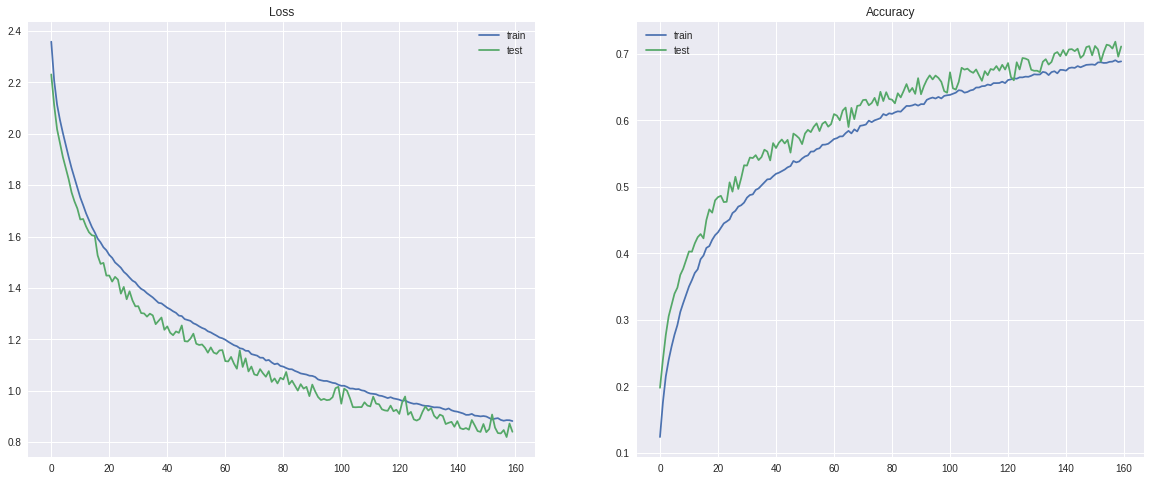

In [0]:
Lenet_Model_batch_norm1 = Lenet_Model_batch_norm()
print(Lenet_Model_batch_norm1.summary())

hist_Lenet_Model_batch_norm= Lenet_Model_batch_norm1.fit(x_cifar10_train, y_train, epochs=epochs, batch_size = 1024, validation_data=(x_cifar10_test, y_test), verbose=1)
plot_hist(hist_Lenet_Model_batch_norm)


###Optimizer###

Optimizor

   1.  Method, e.g. SGD, Adam...
   
   2. Related Parameters, .e.g batch_size, epochs...

[Keras Link](https://keras.io/optimizers/)

Popular optimazation methods include:

1.   Stochastic Grid Descent(SGD);
2.   Adaptive Gradient Algorithm (AdaGrad);
3.   Root Mean Square Propagation (RMSProp)

More information can be found in  [Gentle Introduction to the Adam Optimization Algorithm for Deep Learning](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/).
